# Cat and Dog Imaage clasification using CNN

## 1. CNN: Convolutional Neural Network

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

**Aplications**:
Image & Video recognition, Image Analysis & Classification, Media Recreation, Recommendation Systems, Natural Language Processing, etc.

![title](Img/1.gif)

Important links

<ul>
<li>https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8</li>
<li>https://www.kaggle.com/datasets/tongpython/cat-and-dog</li>
<li>https://www.kaggle.com/code/sangwookchn/convolutional-neural-networks-cnn-keras/data</li>
<li>https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies?resource=download</li>
</ul>

This CNN involves four principal steps

<ol>
<li>Convolution</li>
<li>Pooling</li>
<li>Flattening</li>
<li>Full conection</li>
</ol>

In [1]:
# import libraries

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dense


**Sequential**: Kind of model appropriate for a plain stack of layers where each layer has exactly one input tensor and one outut tensor.

**Conv2d**: A convolution operation maps an input to an output using a filter and a sliding window.
Example: https://deeplizard.com/resource/pavq7noze2

**MaxPooling2D**: Max pooling reduces the size of images by reducing the number of pixels in the output from the previous convolutional layer.
Example: https://deeplizard.com/resource/pavq7noze3

**Flatten**: A flatten layer collapses the spatial dimensions of the input into the channel dimension

**Dense**: hich is used to perform the full connection of the neural network, which is the step 4 in the process of building a CNN


![title](Img/4.png)

# 2. Model

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, 3, input_shape = (64, 64, 3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation='relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [3]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
new_classifier = Sequential()

# Initial convolution
new_classifier.add(Conv2D(16, 2, input_shape = (64, 64, 3), activation='relu'))
new_classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolution
new_classifier.add(Conv2D(32, 2, activation='relu'))
new_classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Third convolution
new_classifier.add(Conv2D(32, 2, activation='relu'))
new_classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten 
new_classifier.add(Flatten())

#
new_classifier.add(Dense(256, activation='relu'))
new_classifier.add(Dense(1, activation='sigmoid'))


In [7]:
new_classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 63, 63, 16)        208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)        

In [12]:
from tensorflow.keras.optimizers import RMSprop
new_classifier.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics='accuracy')

c:\Users\javie\anaconda3\envs\ML\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [3]:
new_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

* Optimizer parameter is to choose the stochastic gradient descent algorithm.
* Loss parameter is to choose the loss function.
* Finally, the metrics parameter is to choose the performance metric.

# 2. Dataset

We have two folders, first **training set** that contains 8000 images of cats and dogs, and **test_set** that contains 2000 other photos for cats and dogs

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test', target_size = (64, 64), batch_size = 32, class_mode = 'binary') 


Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 2 classes.


In [16]:
history = new_classifier.fit(training_set,
steps_per_epoch=8,
epochs=15,
verbose=1,
validation_data = test_set,
 validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 588ms/step - loss: 0.0986 - accuracy: 0.8789 - val_loss: 4.7864 - val_accuracy: 0.5273
Epoch 2/15
8/8 [==============================] - 4s 565ms/step - loss: 2.3304e-04 - accuracy: 1.0000 - val_loss: 6.6122 - val_accuracy: 0.5156
Epoch 3/15
8/8 [==============================] - 3s 420ms/step - loss: 2.1863e-05 - accuracy: 1.0000 - val_loss: 8.0771 - val_accuracy: 0.4766
Epoch 4/15
8/8 [==============================] - 3s 430ms/step - loss: 1.2369e-05 - accuracy: 1.0000 - val_loss: 9.0101 - val_accuracy: 0.4648
Epoch 5/15
8/8 [==============================] - 3s 417ms/step - loss: 3.2457e-06 - accuracy: 1.0000 - val_loss: 9.6648 - val_accuracy: 0.4570
Epoch 6/15
8/8 [==============================] - 4s 511ms/step - loss: 1.4176e-06 - accuracy: 1.0000 - val_loss: 9.2317 - val_accuracy: 0.4961
Epoch 7/15
8/8 [==============================] - 4s 516ms/step - loss: 5.5418e-07 - accuracy: 1.0000 - val_loss: 9.3250 - val_accuracy: 0.4

In [17]:
new_classifier.evaluate(test_set)

64/64 [==============================] - 8s 131ms/step - loss: 12.8104 - accuracy: 0.4998


[12.810441017150879, 0.49975284934043884]

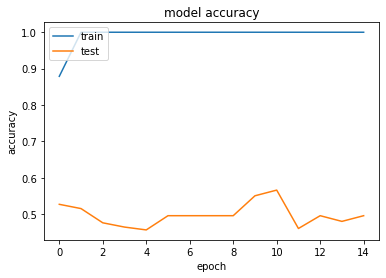

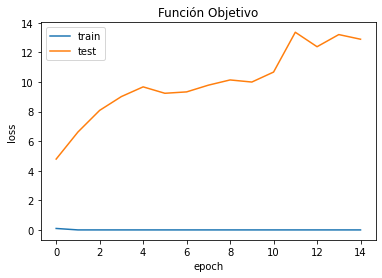

64/64 [==============================] - 8s 129ms/step - loss: 12.8104 - accuracy: 0.4998
Accuracy: 0.50


In [18]:
import matplotlib.pyplot as plt
# Historia de la métrica acccuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Historia de la función objetivo "categorical_cross_entropy"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función Objetivo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
_, accuracy = new_classifier.evaluate(test_set)
print('Accuracy: %.2f' % (accuracy))

In [15]:
classifier.fit_generator(training_set, epochs = 10, validation_data = test_set)

C:\Users\javie\AppData\Local\Temp\ipykernel_12956\4059380008.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, epochs = 10, validation_data = test_set)


Epoch 1/10
124/251 [=============>................] - ETA: 31s - loss: 0.0051 - accuracy: 0.9995

KeyboardInterrupt: 

In [ ]:
len(training_set)

251

In [ ]:
test_set[0]

(array([[[[0.56078434, 0.41176474, 0.27058825],
          [0.56078434, 0.41176474, 0.26666668],
          [0.18823531, 0.08235294, 0.        ],
          ...,
          [0.49803925, 0.3254902 , 0.04705883],
          [0.38431376, 0.25490198, 0.13333334],
          [0.38431376, 0.2392157 , 0.13725491]],
 
         [[0.5568628 , 0.40784317, 0.2627451 ],
          [0.17254902, 0.07450981, 0.        ],
          [0.19215688, 0.07843138, 0.0627451 ],
          ...,
          [0.5372549 , 0.3647059 , 0.07058824],
          [0.45098042, 0.2901961 , 0.08627451],
          [0.36862746, 0.22352943, 0.14901961]],
 
         [[0.14901961, 0.1137255 , 0.04705883],
          [0.12941177, 0.07058824, 0.05882353],
          [0.18823531, 0.09019608, 0.01176471],
          ...,
          [0.50980395, 0.34509805, 0.05490196],
          [0.5372549 , 0.3529412 , 0.08627451],
          [0.36862746, 0.2509804 , 0.11764707]],
 
         ...,
 
         [[0.63529414, 0.54509807, 0.23137257],
          [0.64313

In [ ]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test/cats/cat.4002.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [ ]:
test_image = image.load_img('test/dogs/dog.4005.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [ ]:
print(prediction)

cat
